In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [4]:
df = pd.read_csv('/Users/meganpolak/Downloads/2017_PUDB_Export (1).csv')

In [25]:
# number of borrowers per credit score 
df.BoCreditScor.value_counts()

5    29892
4    17773
3     6035
2     2066
1      130
9       94
Name: BoCreditScor, dtype: int64

In [10]:
df.columns

Index(['Year', 'Assigned ID', 'Bank', 'FIPSStateCode', 'FIPSCountyCode', 'MSA',
       'FeatureID', 'Tract', 'MinPer', 'TraMedY', 'LocMedY', 'Tractrat',
       'Income', 'CurAreY', 'IncRat', 'UPB', 'LTV', 'MortDate', 'AcquDate',
       'Purpose', 'Coop', 'Product', 'FedGuar', 'Term', 'AmorTerm', 'SellType',
       'NumBor', 'First', 'CICA', 'BoRace', 'CoRace', 'BoGender', 'CoGender',
       'BoAge', 'CoAge', 'Occup', 'NumUnits', 'Bed1', 'Bed2', 'Bed3', 'Bed4',
       'Aff1', 'Aff2', 'Aff3', 'Aff4', 'Rent1', 'Rent2', 'Rent3', 'Rent4',
       'RentUt1', 'RentUt2', 'RentUt3', 'RentUt4', 'Geog', 'Rate', 'Amount',
       'Front', 'Back', 'BoCreditScor', 'CoBoCreditScor', 'PMI', 'Self',
       'PropType', 'ArmIndex', 'ArmMarg', 'PrepayP', 'BoEth', 'Race2', 'Race3',
       'Race4', 'Race5', 'CoEth', 'Corace2', 'Corace3', 'Corace4', 'Corace5',
       'HOEPA', 'LienStatus', 'SpcHsgGoals', 'FedFinStbltyPlan', 'AcqTyp',
       'GSEREO'],
      dtype='object')

In [12]:
# mean income for each credit score range 
df.groupby('BoCreditScor')[['Income']].mean()

,Income
BoCreditScor,
1,69162.192308
2,79085.388674
3,94822.982767
4,106562.271648
5,116135.309079
9,102782.702128


In [15]:
# we can establish min income for the approval by state 
lowerstIncomePerState=df.groupby('FIPSStateCode')[['Income']].min()

In [18]:
lowerstIncomePerState


,Income
FIPSStateCode,
1,27924
2,71628
4,15443
5,23916
6,21375
8,15408
9,28080
10,39000
11,38280


In [30]:
# credit score by age 
df.groupby('BoCreditScor')[['BoAge']].mean()

,BoAge
BoCreditScor,
1,39.769231
2,42.353340
3,44.740514
4,45.019918
5,48.302489
9,39.882979


In [39]:
# credit score avarage by Race 
df.groupby('BoRace')[['BoCreditScor']].mean()

,BoCreditScor
BoRace,
1,3.767372
2,4.426087
3,3.833601
4,4.106145
5,4.365152
7,4.393905


In [53]:
# in respect to Credit score 
df.groupby('BoCreditScor')[['Amount', 'Income', 'Rate','LTV']].mean()

,Amount,Income,Rate,LTV
BoCreditScor,,,,
1,157471.615385,69162.192308,0.040912,0.946308
2,174912.331075,79085.388674,0.040454,0.853408
3,203647.809776,94822.982767,0.040493,0.814197
4,232021.935014,106562.271648,0.039878,0.785737
5,238662.675498,116135.309079,0.039161,0.740715
9,127357.074468,102782.702128,0.039105,0.857340


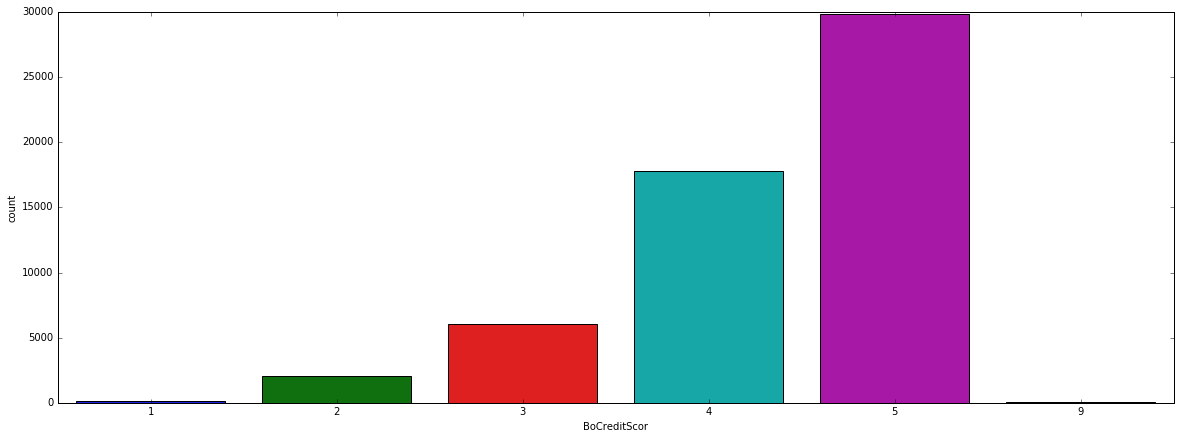

In [69]:
rcParams['figure.figsize']=20,7
pl=sns.countplot(x='BoCreditScor', data=df)
plt.show()


In [73]:
#max income of male with credit score 3 = 660 < 700
df[(df['BoCreditScor'] == 3) & (df['BoGender'] == 1)]['Income'].max()

3785943

In [74]:
#max income of male with credit score  1 = <620
df[(df['BoCreditScor'] == 1) & (df['BoGender'] == 1)]['Income'].max()

154341

In [81]:
#max amount borrowed by male with income > 100000
df[(df['Income'] > 100000) & (df['BoGender'] == 1)]['Amount'].max()

1223475

In [82]:
#max amount borrowed by female with income > 100000
df[(df['Income'] > 100000) & (df['BoGender'] == 2)]['Amount'].max()

960000

In [84]:
df[(df['BoCreditScor'] == 1) & (df['BoGender'] == 2)]['Amount'].max()

367623

In [95]:
df[(df['BoAge'] <25) & (df['Income']>100000 )&(df['BoCreditScor']>5)]['Amount'].max()

38400